# Pole positions for the COMPASS resonances
COMPASS experiment has performed a fit of 13 major waves in the 3pi data set.
The Breit-Wigner parameters have been extracted. Amplitude which have been used in the analysis are analytical functions of the invariant mass square $s$, therefore analytical continuation to the complex plane makes sence.

In the notebook I perform the continuation for the few waves.

![Resonances parameters aj measered by COMPASS](./ajs.png)

![Resonances parameters pij measered by COMPASS](./pijs.png)

### Most of resonances: width does not depend on energy

The Breit-Wigner amplitude with the constant width reads (Eq. 21)
$$
BW = \frac{m_j \Gamma_j}{m_j^2-s-i m_j \Gamma_j}
$$
the pole position is given by $s_p = (m_j^2-im_j\Gamma_j)$

The standard procedure to find the mass and width parameters of the pole is $s_p = (m_\text{p}-i\Gamma_\text{p}/2)^2$.
Therefore, they are a little bit different to BW parameters.

In [1]:
function mΓpole(mBW,ΓBW)
    rep,imp = reim(sqrt(mBW^2-1im*mBW*ΓBW))
    rep, -2*imp
end

mΓpole (generic function with 1 method)

In [2]:
# results the COMPASS fit
const ma2=1.3145; const Γa2=0.1066;
const ma1=1.2990; const Γa1=0.3816;

# simply parameterized a1 resonances
d = Dict()
d["a1(1420)"] = (1410.5, 160.6)
d["a1(1640)"] = (1699.9, 506.8)
d["a2(1700)"] = (1681.3, 436.2)
d["a4(2040)"] = (1935.1, 333.2)
# πJ resonances
d["π(1800)"]  = (1804.3, 220.5)
d["π1(1600)"] = (1603.7, 583.4)
d["π2(1670)"] = (1642.0, 311.1)
d["π2(1880)"] = (1846.6, 245.9)
d["π2(2005)"] = (1962.2, 370.9)
d

Dict{Any,Any} with 9 entries:
  "a4(2040)" => (1935.1, 333.2)
  "π2(2005)" => (1962.2, 370.9)
  "π(1800)"  => (1804.3, 220.5)
  "π2(1880)" => (1846.6, 245.9)
  "a1(1420)" => (1410.5, 160.6)
  "a1(1640)" => (1699.9, 506.8)
  "π1(1600)" => (1603.7, 583.4)
  "π2(1670)" => (1642.0, 311.1)
  "a2(1700)" => (1681.3, 436.2)

In [4]:
# header
print_head() = begin
    println(rpad("resonance:",20),
            rpad("(m_BW, Γ_BW)",20),
            " -> ",
            lpad("(m_pole, Γ_pole)",20))
    println(rpad("",63,"-"))
end
print_head()
# parameters
for (k,v) in sort(collect(d))
    (m,Γ) = mΓpole(v[1],v[2])
    println(rpad(k,20),
        rpad((v[1],v[2]),20),
        " -> ",
        lpad((signif(m,5),signif(Γ,4)),20))
end

resonance:          (m_BW, Γ_BW)         ->     (m_pole, Γ_pole)
---------------------------------------------------------------
a1(1420)            (1410.5, 160.6)      ->      (1412.8, 160.3)
a1(1640)            (1699.9, 506.8)      ->      (1718.3, 501.4)
a2(1700)            (1681.3, 436.2)      ->      (1695.2, 432.6)
a4(2040)            (1935.1, 333.2)      ->      (1942.2, 332.0)
π(1800)             (1804.3, 220.5)      ->      (1807.7, 220.1)
π1(1600)            (1603.7, 583.4)      ->      (1629.2, 574.3)
π2(1670)            (1642.0, 311.1)      ->      (1649.3, 309.7)
π2(1880)            (1846.6, 245.9)      ->      (1850.7, 245.4)
π2(2005)            (1962.2, 370.9)      ->      (1970.9, 369.3)


### Special $a_2(1320)$
The parameterization is given by Eq.(24).

$$
\Gamma(s) = \Gamma_0\frac{m_{a_2}}{\sqrt{s}}
\bigg[
    (1-x)\frac{q_{\rho\pi}(\sqrt{s})}{q_{\rho\pi}(m_{a_2})}\frac{F_2(R^2q_{\rho\pi}^2(\sqrt{s}))}{F_2(R^2q_{\rho\pi}^2(m_{a_{2}}))}
    +x\frac{q_{\eta\pi}(\sqrt{s})}{q_{\eta\pi}(m_{a_2})}\frac{F_2(R^2q_{\eta\pi}^2(\sqrt{s}))}{F_2(R^2q_{\eta\pi}^2(m_{a_{2}}))}
\bigg],\quad
F_2(z) = \frac{z^2}{9+3z+z^2}
$$
with the parameters:
 - $x = 0.2$
 - $R = 5\,$GeV$^{-1}$

In [5]:
λ(x,y,z)=x^2+y^2+z^2-2*x*y-2*y*z-2*z*x;

function a2II(s)
    mρ=0.768; mρ2=mρ^2 # mass.indep paper
    mη=0.54786; mη2=mη^2
    mπ=0.139; mπ2=mπ^2
    # obtained parameters
    ma2sq=ma2^2
    # rho pi
    qρ=sqrt(λ(s,mρ2,mπ2)/(4s))
    qρ0=sqrt(λ(ma2sq,mρ2,mπ2)/(4ma2sq))
    Rsq = 5.0^2;
    # eta pi
    qη=sqrt(λ(s,mρ2,mπ2)/(4s))
    qη0=sqrt(λ(ma2sq,mρ2,mπ2)/(4ma2sq))
    # fraction
    xf = 0.2
    # barrier factors
    F2sq(z)=z^2/(9+3z+z^2)
    # enegry-dep. width
    Γ = Γa2*ma2/sqrt(s)*(
        (1-xf)*qρ/qρ0*F2sq(qρ^2*Rsq)/F2sq(qρ0^2*Rsq) +
           xf *qη/qη0*F2sq(qη^2*Rsq)/F2sq(qη0^2*Rsq) )
    ma2sq-s-1im*ma2*Γ
end

a2II (generic function with 1 method)

In [13]:
using Plots


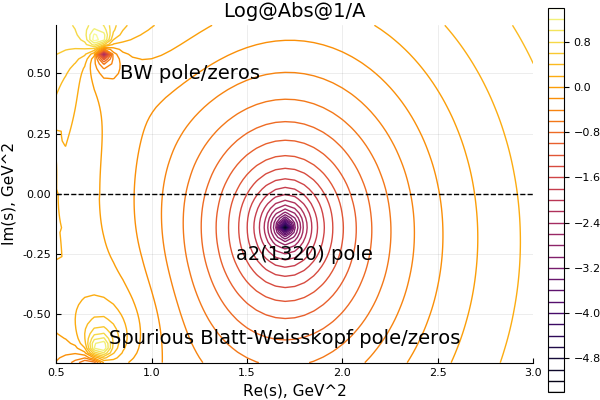

In [14]:
sx = 0.5:0.05:3.0
sy = -0.7:0.02:0.7
fss = [a2II(sr+1im*si) for si in sy, sr in sx]
#
contour(sx, sy, [log(abs(f)) for f in fss], levels=40,
    title="Log@Abs@1/A", xlab = "Re(s), GeV^2", ylab = "Im(s), GeV^2")
annotate!(1.7 ,-0.6, "Spurious Blatt-Weisskopf pole/zeros")
annotate!(1.2 ,+0.5, "BW pole/zeros")
annotate!(1.8 ,-0.25,"a2(1320) pole")
hline!([0],lc=:black,label="",ls=:dash)

Zoom of the previous plot


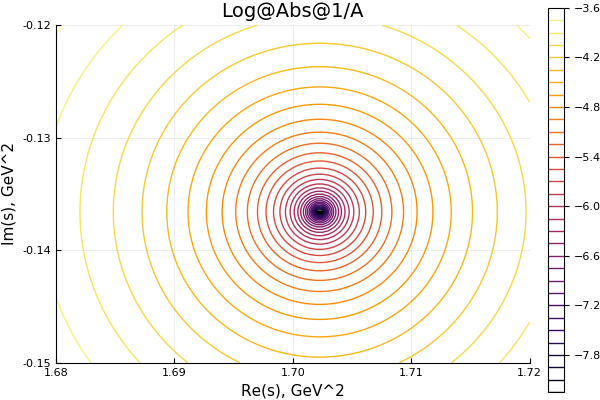

In [15]:
sx = 1.68:0.5e-3:1.72
sy = -0.15:0.2e-3:-0.12
fss = [a2II(sr+1im*si) for si in sy, sr in sx]
contour(sx, sy, [log(abs(f)) for f in fss], levels=40,
    title="Log@Abs@1/A", xlab = "Re(s), GeV^2", ylab = "Im(s), GeV^2")

Pole position, approximately

In [16]:
(ma2pole,Γa2pole) = 
begin
    sp = 1.705-0.137im # just by eye
    rep,imp = reim(sqrt(sp))
    rep,-2.*imp
end

(1.3068081821599387, 0.10483558480140641)

In [17]:
print_head()
begin
        println(rpad("a2(1320)",20),
        rpad((ma2,Γa2),20),
        " -> ",
        lpad((round(ma2pole,3),round(Γa2pole,3)),20))
end

resonance:          (m_BW, Γ_BW)         ->     (m_pole, Γ_pole)
---------------------------------------------------------------
a2(1320)            (1.3145, 0.1066)     ->       (1.307, 0.105)


### $a_1(1260)$ the trickiest one
energy-dependent width involves quasi-two-body parameterization

To continue, I use non-symmetrized matrix element which makes it different to original COMPASS parameterization.
In the calculation below:
$$
\Gamma(s) = \Gamma_0 \frac{\rho(s)}{\rho(m_{a_1}^2)}\frac{m_{a_1}}{\sqrt{s}},\quad\text{where}\quad
\rho(s) = \int_{4m_\pi^2}^{(\sqrt{s}-m_\pi)^2} \frac{\mathrm{d}s_1}{2\pi} U_\rho(s)
\frac{1}{8\pi} \frac{\lambda^{1/2}(s,s_1,m_\pi^2)}{s}
$$

the function $U(s_1)$ is a given of rho meson line shape $U(s_1) = \big|f_\rho(s_1)\big|^2 (1-4m_\pi^2/s_1)^{1/2}$

In [18]:
using QuadGK

In [19]:
const mπ=0.139; const mπ2=mπ^2;

In [20]:
ρ(s,m1sq,m2sq)=1/(8*π)*sqrt(λ(s,m1sq,m2sq))/s
# arbitrary normalization 
function Uρ(s)
    mρ=0.7685; mρ2=mρ^2 # mass.indep paper
    # Break-up momentum
    p = sqrt(λ(s,mπ2,mπ2)/(4*s))
    p0 = sqrt(λ(mρ2,mπ2,mπ2)/(4*mρ2))
    # Blatt-Weisskopf stuff
    R = 5  # GeV^-1
    F = 1./(1./R^2+p^2)
    F0 = 1./(1./R^2+p0^2)
    # FF
    BWs = p^2*F/(p0^2*F0)
    # Energy dependent width
    Γ0 = 0.1507;
    Γ = Γ0*(p/p0)*mρ/sqrt(s)*BWs
    return BWs/((mρ^2-s)^2+mρ^2*Γ^2)
end

Uρ (generic function with 1 method)

In [21]:
using QuadGK

In [22]:
# complex agrument
ρ(s::Complex{Float64}) = 1/(8*π*s)/(2π)*begin
    s_f = (sqrt(s)-mπ)^2 # final piont
    s_m = real(s_f)+1.0im*imag(s_f)/100; # point in the middle
    integrand = s1->begin
        sqrt(λ(s,s1,mπ^2))*Uρ(s1)*sqrt(λ(s1,mπ2,mπ2))/(8*π*s1)
    end
    int1 = quadgk(integrand, 4*mπ2, s_m)[1]
    int2 = quadgk(integrand, s_m, s_f)[1]
    int1+int2
end

ρ (generic function with 2 methods)

In [23]:
function a1II(s::Complex{Float64},m0,Γ0)
    Γ = Γ0*m0/sqrt(s)*ρ(s)/ρ(m0^2+1e-5im)
    m0^2-s-1im*m0*Γ
end

a1II (generic function with 1 method)

The first and the second sheet of the complex plane


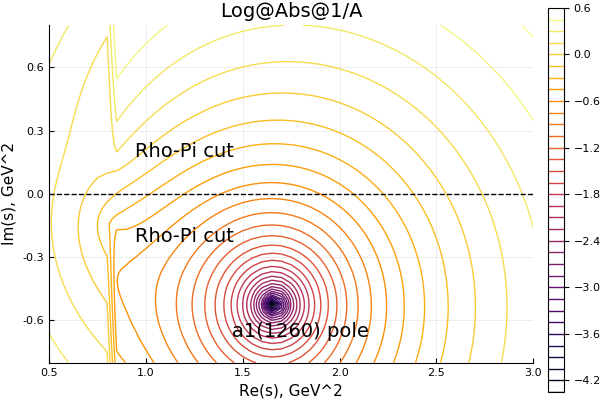

In [24]:
sx = 0.5:0.05:3.0
sy = -0.8:0.02:0.8
fss = [a1II(sr+1im*si,ma1,Γa1) for si in sy, sr in sx]
#
contour(sx, sy, [log(abs(f)) for f in fss], levels=40,
    title="Log@Abs@1/A", xlab = "Re(s), GeV^2", ylab = "Im(s), GeV^2")
annotate!(1.2 ,-0.2,"Rho-Pi cut")
annotate!(1.2 , 0.2,"Rho-Pi cut")
annotate!(1.8 ,-0.65,"a1(1260) pole")
hline!([0],lc=:black,label="",ls=:dash)

Zoom of the previous plot


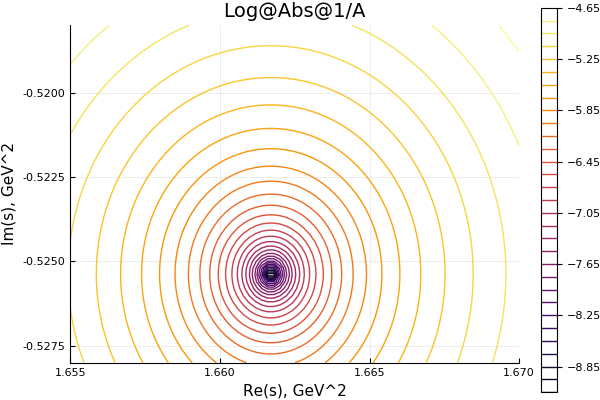

In [25]:
sx = 1.655:0.2e-3:1.67
sy = -0.528:0.2e-3:-0.518
fss = [a1II(sr+1im*si,ma1,Γa1) for si in sy, sr in sx]
#
contour(sx, sy, [log(abs(f)) for f in fss], levels=40,
    title="Log@Abs@1/A", xlab = "Re(s), GeV^2", ylab = "Im(s), GeV^2")

In [26]:
(ma1pole,Γa1pole) = 
begin
    sp = 1.662-0.522im # just by eye
    rep,imp = reim(sqrt(sp))
    rep,-2.*imp
end

(1.304616240833809, 0.40011766193128057)

In [27]:
print_head()
begin
        println(rpad("a1(1260)",20),
        rpad((ma1,Γa1),20),
        " -> ",
        lpad((round(ma1pole,3),round(Γa1pole,3)),20))
end

resonance:          (m_BW, Γ_BW)         ->     (m_pole, Γ_pole)
---------------------------------------------------------------
a1(1260)            (1.299, 0.3816)      ->         (1.305, 0.4)
